In [2]:
from keras.datasets import cifar10
from matplotlib import pyplot

In [3]:
(X_train,y_train), (X_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 256s 2us/step


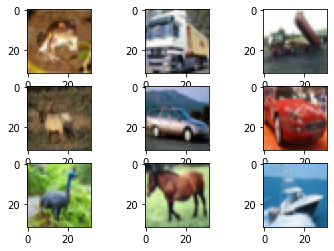

In [5]:
for i in range(0,9):
    pyplot.subplot(330+i+1)
    pyplot.imshow(X_train[i])
pyplot.show()

In [6]:
# Simple CNN for CIFAR-10

In [8]:
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

In [9]:
seed = 7
numpy.random.seed(seed)

In [10]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [11]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255.0
X_test = X_test/255.0

In [13]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [31]:
model = Sequential()
model.add(Convolution2D(32,(3,3),input_shape = (32,32,3),padding = "same", activation = 'relu',W_constraint = maxnorm(3)))
model.add(Dropout(0.2))
model.add(Convolution2D(32,(3,3),activation="relu",padding='same',W_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',W_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation="softmax"))

/home/arvind/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., padding="same", activation="relu", kernel_constraint=<keras.con...)`
  
/home/arvind/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same", kernel_constraint=<keras.con...)`
  after removing the cwd from sys.path.
/home/arvind/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, activation="relu", kernel_constraint=<keras.con...)`
  import sys


In [32]:
epochs = 25
lrate=0.01
decay = lrate/epochs
sgd = SGD(lr=lrate,momentum=0.9,decay=decay,nesterov=False)

In [33]:
model.compile(loss="categorical_crossentropy",optimizer=sgd,metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_8 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)              

In [35]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs,batch_size=32,verbose=2)

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
 - 150s - loss: 1.7327 - accuracy: 0.3715 - val_loss: 1.4096 - val_accuracy: 0.4941
Epoch 2/25
 - 151s - loss: 1.3530 - accuracy: 0.5136 - val_loss: 1.1812 - val_accuracy: 0.5774
Epoch 3/25
 - 162s - loss: 1.1798 - accuracy: 0.5798 - val_loss: 1.1036 - val_accuracy: 0.6135
Epoch 4/25
 - 181s - loss: 1.0561 - accuracy: 0.6251 - val_loss: 1.0653 - val_accuracy: 0.6251
Epoch 5/25
 - 158s - loss: 0.9603 - accuracy: 0.6584 - val_loss: 0.9911 - val_accuracy: 0.6491
Epoch 6/25
 - 147s - loss: 0.8799 - accuracy: 0.6851 - val_loss: 0.9694 - val_accuracy: 0.6586
Epoch 7/25
 - 144s - loss: 0.8066 - accuracy: 0.7143 - val_loss: 0.9350 - val_accuracy: 0.6732
Epoch 8/25
 - 145s - loss: 0.7436 - accuracy: 0.7359 - val_loss: 0.9218 - val_accuracy: 0.6841
Epoch 9/25
 - 144s - loss: 0.6839 - accuracy: 0.7575 - val_loss: 0.9177 - val_accuracy: 0.6881
Epoch 10/25
 - 144s - loss: 0.6377 - accuracy: 0.7755 - val_loss: 0.9174 - val_accuracy: 0.6925

In [36]:
scores = model.evaluate(X_test,y_test,verbose=0)

In [37]:
print("Accuracy: %.2f%%"%(scores[1]*100))

Accuracy: 70.56%


In [38]:
# Larger CNN for CIFAR-10

In [39]:
model = Sequential()
model.add(Convolution2D(32,(3,3),input_shape= (32,32,3),activation="relu",padding = "same"))
model.add(Dropout(0.2))
model.add(Convolution2D(32,(3,3),activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(64,(3,3),activation="relu",padding="same"))
model.add(Dropout(0.2))
model.add(Convolution2D(64,(3,3),activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(128,(3,3),activation="relu",padding="same"))
model.add(Dropout(0.2))
model.add(Convolution2D(128,(3,3),activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024,activation="relu",W_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512,activation="relu",W_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes,activation="softmax"))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_10 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_11 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)       

/home/arvind/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1024, activation="relu", kernel_constraint=<keras.con...)`
  app.launch_new_instance()
/home/arvind/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, activation="relu", kernel_constraint=<keras.con...)`


In [40]:
epochs = 25
lrate=0.01
decay=lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9,decay=decay,nesterov=False)

In [41]:
model.compile(loss="categorical_crossentropy",optimizer=sgd,metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_10 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_11 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)       

In [44]:
model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs = epochs, batch_size=64)

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 238s 5ms/step - loss: 1.9247 - accuracy: 0.2882 - val_loss: 1.6916 - val_accuracy: 0.3990
Epoch 2/25
50000/50000 [==============================] - 236s 5ms/step - loss: 1.4934 - accuracy: 0.4553 - val_loss: 1.4139 - val_accuracy: 0.4862
Epoch 3/25
50000/50000 [==============================] - 238s 5ms/step - loss: 1.3198 - accuracy: 0.5223 - val_loss: 1.1991 - val_accuracy: 0.5702
Epoch 4/25
50000/50000 [==============================] - 254s 5ms/step - loss: 1.1867 - accuracy: 0.5729 - val_loss: 1.0903 - val_accuracy: 0.6057
Epoch 5/25
50000/50000 [==============================] - 291s 6ms/step - loss: 1.0713 - accuracy: 0.6155 - val_loss: 1.0617 - val_accuracy: 0.6197
Epoch 6/25
50000/50000 [==============================] - 236s 5ms/step - loss: 0.9789 - accuracy: 0.6520 - val_loss: 0.9587 - val_accuracy: 0.6627
Epoch 7/25
50000/50000 [==============================] - 262s

In [45]:
scores = model.evaluate(X_test,y_test,verbose=1)

10000/10000 [==============================] - 10s 1ms/step


In [46]:
print("Accuracy: %.2f%%"%(scores[1]*100))

Accuracy: 78.31%
